In [1]:
!pip cache purge # Sometimes the local cache may cause issues. You can clear the pip cache

Files removed: 1277


In [4]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#The issue you're encountering is due to the fact that the sklearn package is deprecated. 
#Instead of pip install sklearn, you need to install scikit-learn directly. 
#!pip install sklearn

In [5]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
The error you're encountering, UnicodeDecodeError, typically occurs when the CSV file contains characters that aren't properly decoded using the default encoding (utf-8).

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('spam.csv', encoding='latin1') # #Latin-1 is occasionally, though imprecisely, referred to as Extended ASCII. This is because the first 128 characters of its set are identical to the US ASCII standard. 
df.shape                                             #The remainder of the set contains accented characters and symbols.


(5572, 5)

In [3]:
#Get shape and head
print(df.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

In [60]:

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False) #True (default): Splits/wraps the DataFrame across multiple lines if it's too wide.
                                                    #False: Displays the DataFrame in one continuous line, regardless of width.
pd.set_option('max_colwidth',None)  #Setting max_colwidth to None removes this limit. This means Pandas will display the full content of each cell, regardless of how long the text is.
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,NaN,NaN,NaN


In [8]:
df = df.rename(columns={'v1': 'category', 'v2': 'text'})
df


,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
newdf=df[['text', 'category']]
newdf

,text,category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [6]:
CORPUS = [
'the sky is blue',
'sky is blue and sky is beautiful',
'the beautiful sky is so blue',
'i love blue cheese'
]
new_doc = ['loving this blue sky today']

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the corpus
CORPUS = [
    'the sky is blue',
    'sky is blue and sky is beautiful',
    'the beautiful sky is so blue',
    'i love blue cheese'
]

#new_doc = ['loving this blue sky today']

# Define a function to extract n-grams
def extract_ngrams(corpus, ngram_range=(1,1)):
    
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    
    # Fit on corpus and transform both corpus and new document
    
    X_corpus = vectorizer.fit_transform(corpus)
    #X_new_doc = vectorizer.transform(new_doc)
    
   


Unigrams:
['and' 'beautiful' 'blue' 'cheese' 'is' 'love' 'sky' 'so' 'the']


corpus matrix is
 [[0 0 1 0 1 0 1 0 1]
 [1 1 1 0 2 0 2 0 0]
 [0 1 1 0 1 0 1 1 1]
 [0 0 1 1 0 1 0 0 0]]


In [ ]:
corpus_unigrams = extract_ngrams(CORPUS, ngram_range=(1, 1))

In [ ]:
 # Get feature names (n-grams)
    feature_names = vectorizer.get_feature_names_out()
    
    # Convert the results to arrays
    corpus_ngrams = X_corpus.toarray()
    #new_doc_ngrams = X_new_doc.toarray()
    
    return feature_names, corpus_ngrams

# Unigrams (1-gram)
unigrams, corpus_unigrams = extract_ngrams(CORPUS, ngram_range=(1, 1))
print("Unigrams:")
print(unigrams)
print("\n")
print("corpus matrix is\n", corpus_unigrams)
#print(new_doc_unigrams)


In [98]:
# Bigrams (2-grams)
bigrams, corpus_bigrams = extract_ngrams(CORPUS, ngram_range=(2, 2))
print("\nBigrams:")
print(bigrams)
print(corpus_bigrams)
#print(new_doc_bigrams)

# Trigrams (3-grams)
trigrams, corpus_trigrams= extract_ngrams(CORPUS, ngram_range=(3, 3))
print("\nTrigrams:")
print(trigrams)
print(corpus_trigrams)
#print(new_doc_trigrams)



Bigrams:
['and sky' 'beautiful sky' 'blue and' 'blue cheese' 'is beautiful'
 'is blue' 'is so' 'love blue' 'sky is' 'so blue' 'the beautiful'
 'the sky']
[[0 0 0 0 0 1 0 0 1 0 0 1]
 [1 0 1 0 1 1 0 0 2 0 0 0]
 [0 1 0 0 0 0 1 0 1 1 1 0]
 [0 0 0 1 0 0 0 1 0 0 0 0]]

Trigrams:
['and sky is' 'beautiful sky is' 'blue and sky' 'is blue and' 'is so blue'
 'love blue cheese' 'sky is beautiful' 'sky is blue' 'sky is so'
 'the beautiful sky' 'the sky is']
[[0 0 0 0 0 0 0 1 0 0 1]
 [1 0 1 1 0 0 1 1 0 0 0]
 [0 1 0 0 1 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the corpus and new document
CORPUS = [
    'the sky is blue',
    'sky is blue and sky is beautiful',
    'the beautiful sky is so blue',
    'i love blue cheese'
]

new_doc = ['loving this blue sky today']

# Define a function to extract n-grams and return them as a DataFrame
def extract_ngrams_df(corpus, new_doc, ngram_range=(1,1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    
    # Fit on corpus and transform both corpus and new document
    X_corpus = vectorizer.fit_transform(corpus)
    print(type(X_corpus))
    print(X_corpus)
    X_new_doc = vectorizer.transform(new_doc)
    
    # Get feature names (n-grams)
    feature_names = vectorizer.get_feature_names_out()
    print("\n\n features names are: ",feature_names)

    features = X_corpus.toarray()           #toarray() and todense( ) are equivalent
    # Convert the results to arrays
    print("*********************************************************************")
    print("\n features are ",X_corpus.todense()) # dense matrix representation
    print("\n features are\n",features) # dense matrix representation
    print("\n\n")
    
    corpus_ngrams = X_corpus.toarray().sum(axis=0)  # Sum counts across all corpus documents
    #new_doc_ngrams = X_new_doc.toarray().flatten()  # Flatten the new document's array
    
    # Create a DataFrame for better visualization
    df1 = pd.DataFrame(data=features,
            columns=feature_names)
    
    df2 = pd.DataFrame({
        'N-gram': feature_names,
       'Corpus Count': corpus_ngrams,
        
     })

    
    
    return df1, df2

# Unigrams (1-gram)
df_unigrams1, df_unigrams2 = extract_ngrams_df(CORPUS, new_doc, ngram_range=(1, 1))
print("\n\nUnigrams1 DataFrame:")
print(df_unigrams1)
print("\n\nUnigrams2 DataFrame:")
print(df_unigrams2)



In [ ]:
X_new_doc = vectorizer.transform(new_doc)
    
    # Get feature names (n-grams)
    feature_names = vectorizer.get_feature_names_out()
    print("\n\n features names are: ",feature_names)

    features = X_corpus.toarray()           #toarray() and todense( ) are equivalent
    # Convert the results to arrays
    #print("\n features are ",X_corpus.todense()) # dense matrix representation
    print("\n features are\n",features) # dense matrix representation
    print("\n\n")
    
    corpus_ngrams = X_corpus.toarray().sum(axis=0)  # Sum counts across all corpus documents
    #new_doc_ngrams = X_new_doc.toarray().flatten()  # Flatten the new document's array
    
    # Create a DataFrame for better visualization
    df1 = pd.DataFrame(data=features,
            columns=feature_names)
    
    df2 = pd.DataFrame({
        'N-gram': feature_names,
       'Corpus Count': corpus_ngrams,
        
     })

    
    
    return df1, df2





In [ ]:
# Bigrams (2-grams)
df_bigrams1, df_bigrams2 = extract_ngrams_df(CORPUS, new_doc, ngram_range=(2, 2))
print("\nBigrams1 DataFrame:")
print(df_bigrams1)

print("\nBigrams2 DataFrame:")
print(df_bigrams2)




In [ ]:
# Trigrams (3-grams)
df_trigrams = extract_ngrams_df(CORPUS, new_doc, ngram_range=(3, 3))
print("\nTrigrams DataFrame:")
print(df_trigrams)

In [13]:
arr=[
      [1, 1, 1, 1],  # Document 1
      [0, 2, 1, 1],  # Document 2
      [1, 1, 1, 1]   # Document 3
   ]


In [15]:
arr.torray().sum(axis=0) #will sum the counts for each unigram (column-wise) across all documents:

AttributeError: 'list' object has no attribute 'torray'

In [18]:
from scipy.sparse import csr_matrix
import numpy as np

# Define non-zero values and their coordinates
data = np.array([3, 4, 5])          # Non-zero values
row_indices = np.array([0, 1, 2])   # Row indices
col_indices = np.array([2, 0, 1])   # Column indices

# Create a sparse matrix
sparse_matrix = csr_matrix((data, (row_indices, col_indices)), shape=(3, 3))

# Display the sparse matrix
print(sparse_matrix)


  (0, 2)	3
  (1, 0)	4
  (2, 1)	5


In [19]:
from scipy.sparse import csr_matrix

# Define a dense 2D list (matrix)
dense_array = [
    [0, 0, 3],
    [4, 0, 0],
    [0, 5, 0]
]

# Create a sparse matrix
sparse_matrix = csr_matrix(dense_array)

# Display the sparse matrix
print(sparse_matrix)


  (0, 2)	3
  (1, 0)	4
  (2, 1)	5


In [20]:
sparse_matrix.toarray()

array([[0, 0, 3],
       [4, 0, 0],
       [0, 5, 0]], dtype=int32)

In [21]:
sparse_matrix.toarray().sum(axis=0)

array([4, 5, 3], dtype=int32)

In [5]:
df=pd.read_csv('spam.csv', encoding='latin1') # #Latin-1 is occasionally, though imprecisely, referred to as Extended ASCII. This is because the first 128 characters of its set are identical to the US ASCII standard. 
df.shape    

(5572, 5)

In [10]:
df = df.rename(columns={'v1': 'category', 'v2': 'text'})
newdf=df[['text', 'category']]
newdf

,text,category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


Step 2: Data Analysis<br>
1. Check for Missing Values: It’s essential to check if there are any missing values in your DataFrame.
2. Class Distribution: Check how many messages are "ham" and how many are "spam."

In [11]:
print(newdf['text'].isnull().sum(axis=0))

0


In [7]:
print(newdf.isnull().sum())


text        0
category    0
dtype: int64


In [8]:
#Class Distribution: Check how many messages are "ham" and how many are "spam."
print(df['category'].value_counts())


category
ham     4825
spam     747
Name: count, dtype: int64


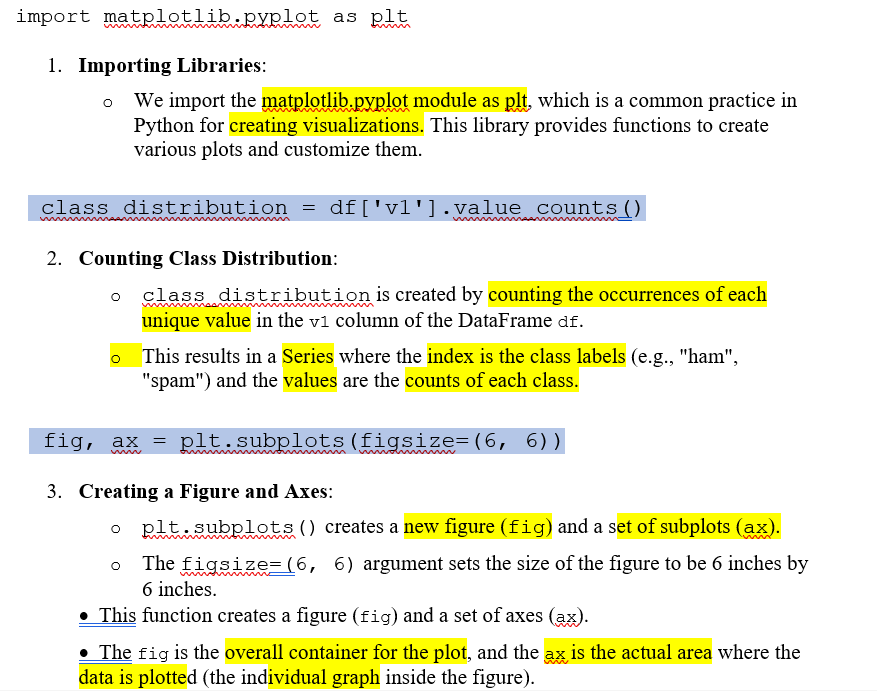
The ax object is used later to plot the bars using the ax.bar() method.
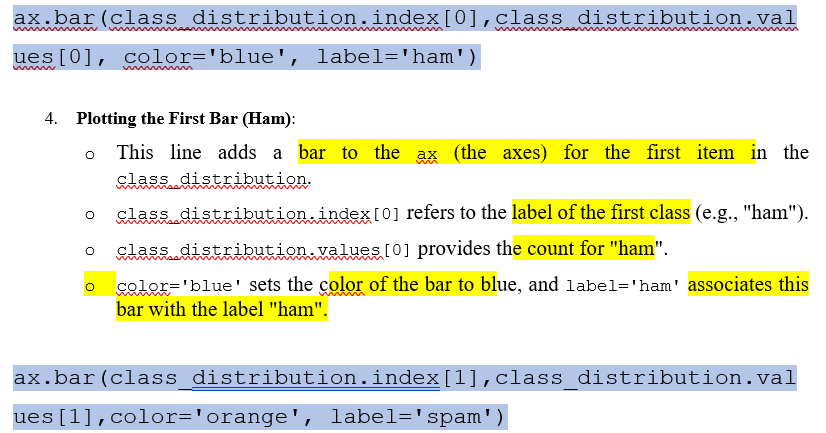
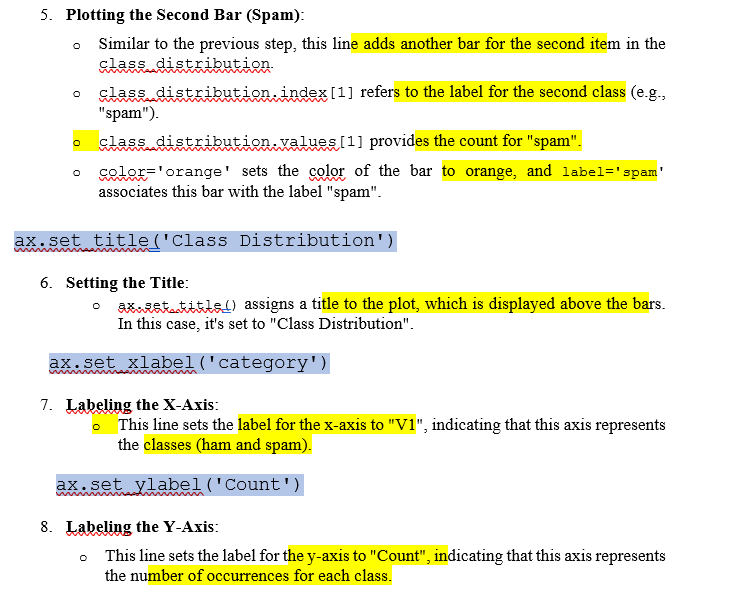
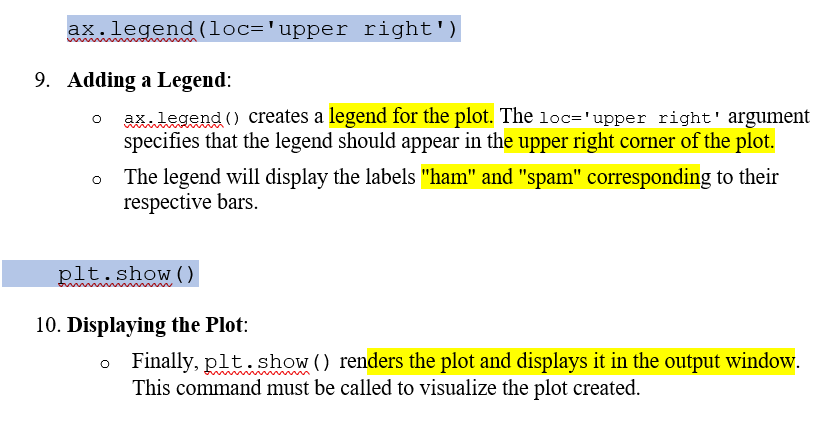


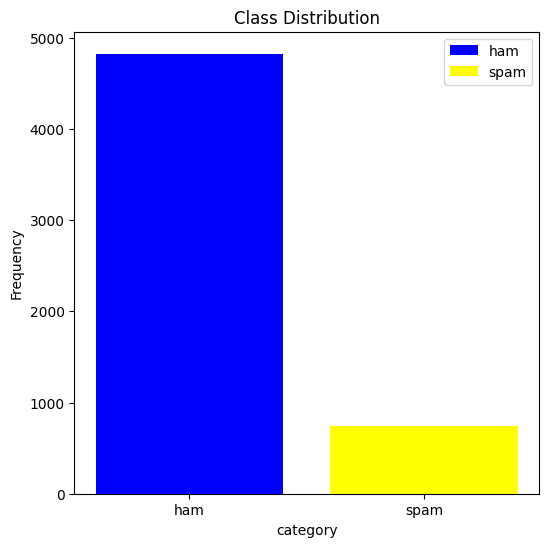

In [12]:
#The legend is the small box (usually on the side or top of the graph) with labels "Ham" and "Spam" 
#showing the color associated with each class.

import matplotlib.pyplot as plt

# Bar Plot for Class Distribution
class_distribution = newdf['category'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot each bar separately to associate them with labels
ax.bar(class_distribution.index[0], class_distribution.values[0], color='blue', label='ham')
ax.bar(class_distribution.index[1], class_distribution.values[1], color='yellow', label='spam')

# Add title and labels
ax.set_title('Class Distribution')
ax.set_xlabel('category')
ax.set_ylabel('Frequency')

# Add a legend with the correct labels
ax.legend(loc='upper right')

# Show the plot
plt.show()

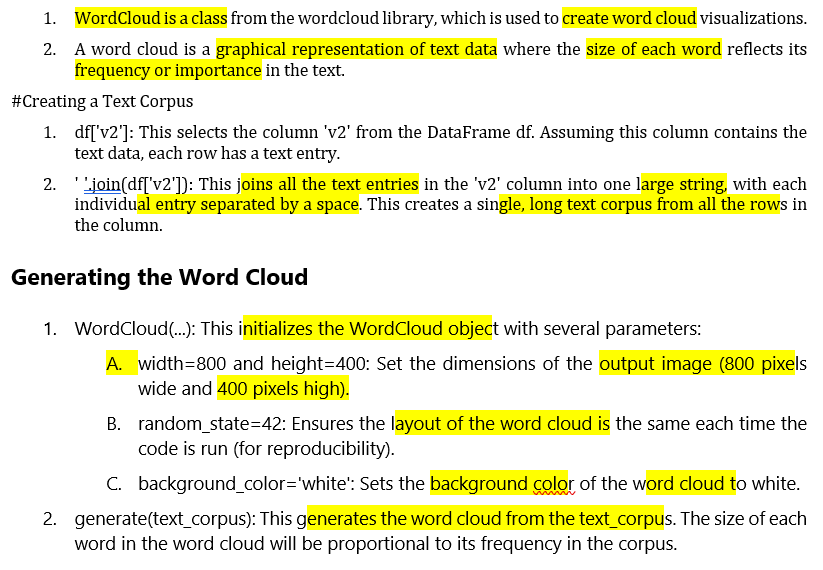

In [13]:
newdf['text'].head(2)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: text, dtype: object

In [14]:
' '.join(newdf['text'].head(2))

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni...'

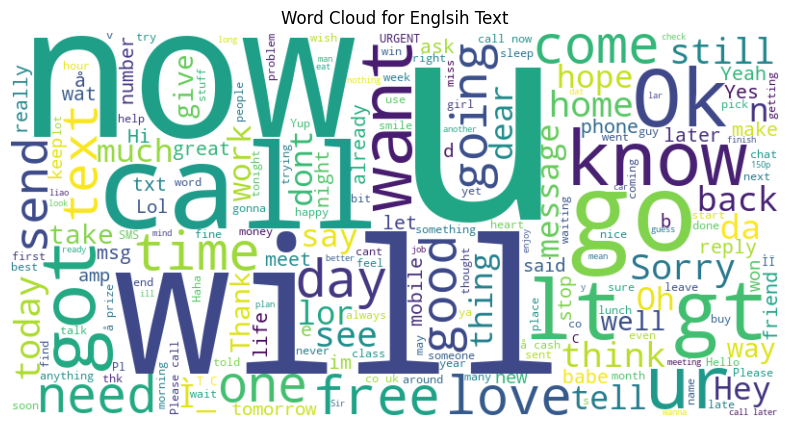

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text_corpus = ' '.join(newdf['text'])
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_corpus)

# #This creates a new figure (or canvas) for the plot, with a size of 10 inches by 5 inches.
#This function is used to create a new figure(or the overall space where the plot will be drawn) or plotting area.
plt.figure(figsize=(10, 5))


##This displays the word cloud image. The wordcloud object contains the graphical representation of the word cloud.
#interpolation='bilinear': This smooths the image when it is displayed, making the word cloud appear less pixelated.
plt.imshow(wordcloud, interpolation='bilinear') 

##his removes the axis from the plot, so no axis lines or labels are shown
plt.axis('off')

##Adds a title to the plot, in this case, "Word Cloud for Text."
plt.title('Word Cloud for Englsih Text')

# Displays the plot with the word cloud.
plt.show()

1. Step 3: Text Preprocessing
2. Before you can use this data for modeling, you typically need to preprocess the text data. Common steps include:

3. Lowercasing
4. Removing punctuation
5. Removing stop words
6. Tokenization
7. Converting text to numerical features (e.g., using Bag of Words or TF-IDF)

In [32]:
s=r'\n'
print(s)
t= '\n'
print(t)

\n




In [15]:
import re
text='&&&&&akhtar age is 14 and??? saeed age is 15 are %%%friends but they usually++++++++disagree on certain matters'
text1=re.sub(r'[^a-zA-Z0-9\s]', '', text)
text1=text1.split(" ")
text1

['akhtar',
 'age',
 'is',
 '14',
 'and',
 'saeed',
 'age',
 'is',
 '15',
 'are',
 'friends',
 'but',
 'they',
 'usuallydisagree',
 'on',
 'certain',
 'matters']

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')



In [17]:
cleantext=[x for x in text1 if x not in stop]
cleantext

NameError: name 'text1' is not defined

In [67]:
text= ['akhtar',  'age',  'is',  '14',  'and','15']
print(" ".join(text))

akhtar age is 14 and 15


In [18]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.split(" ")
    
    text = [x for x in text if x not in stop]
    return " ".join(text)

# Apply preprocessing to the Message column
df['Cleaned_Text'] = df['text'].apply(preprocess_text)

# Display the cleaned messages
print(df[['text', 'Cleaned_Text']].head(6))


                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   

                                        Cleaned_Text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  
5  freemsg hey darling 3 weeks word back id like ...  


In [ ]:
# Display the cleaned messages
print(df[['Cleaned_Text']].head(2))

1. Step 4: Feature Extraction
2. You can use CountVectorizer to convert the cleaned text data into numerical format.

In [19]:
# Create features and labels
X = df['Cleaned_Text']
y = df['category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)


In [21]:
X_test_vectorized = vectorizer.transform(X_test)

print(X_train_vectorized.shape)
print(X_test_vectorized.shape)
print(X_train_vectorized[0].toarray())

(4457, 8218)
(1115, 8218)
[[0 0 0 ... 0 0 0]]


In [21]:
# Vectorize the text data with bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Extract bigrams
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

# Vectorize the text data with trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))  # Extract trigrams
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print(X_train_vectorized.shape)
print(X_test_vectorized.shape)



(4457, 26355)
(1115, 26355)
(4457, 25821)
(1115, 25821)


In [50]:

# Vectorize the text data with unigrams, bigrams, and trigrams
vectorizer = CountVectorizer(ngram_range=(1, 3))  # Extract unigrams, bigrams, and trigrams
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

(4, 194)
(2, 194)


Step 5: Building a Classifier

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize and train the classifier
classifier = MultinomialNB() 
classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
# Evaluate the model
report=classification_report(y_test, y_pred)

print(report)
print("############################################################\n")


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.88      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

############################################################



In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[961   4]
 [ 18 132]]
